### We'll use CNNs to classify cats and dogs
### Data augmentation and dropout layers will prevent overfitting.

In [1]:
import numpy as np
import pandas as pd
import os
import shutil

In [2]:
original_dataset_dir = '../input/dogs-vs-cats/train/train/'

In [3]:
print('total training images:', len(os.listdir(original_dataset_dir)))

total training images: 25000


In [4]:
base_dir = '/' # Current directory

## Now, let's split these images into training, validation and test sets.
### Note: next code block might need 5 minutes to complete.

In [5]:
# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 8000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 2000 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(8000, 10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 1000 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 11000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 8000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(8000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 2000 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(8000, 10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 1000 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 11000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('\ntotal validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('\ntotal test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 8000
total training dog images: 8000

total validation cat images: 2000
total validation dog images: 2000

total test cat images: 1000
total test dog images: 1000


# Without Data Augmentation

In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [9]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 9s 85ms/step - loss: 0.6893 - acc: 0.5590 - val_loss: 0.6968 - val_acc: 0.4990
Epoch 2/100
100/100 [==============================] - 9s 86ms/step - loss: 0.6665 - acc: 0.5955 - val_loss: 0.6949 - val_acc: 0.5450
Epoch 3/100
100/100 [==============================] - 8s 85ms/step - loss: 0.6275 - acc: 0.6450 - val_loss: 0.6646 - val_acc: 0.5970
Epoch 4/100
100/100 [==============================] - 8s 79ms/step - loss: 0.6021 - acc: 0.6715 - val_loss: 0.6364 - val_acc: 0.6440
Epoch 5/100
100/100 [==============================] - 8s 81ms/step - loss: 0.5852 - acc: 0.6900 - val_loss: 0.5791 - val_acc: 0.7040
Epoch 6/100
100/100 [==============================] - 8s 82ms/step - loss: 0.5611 - acc: 0.7125 - val_loss: 0.5577 - val_acc: 0.7180
Epoch 7/100
100/100 [==============================] - 8s 80ms/step - loss: 0.5716 - acc: 0.7020 - val_loss: 0.5286 - val_acc: 0.7430
Epoch 8/100
100/100 [==============================] - 8s 81ms

In [13]:
model.save('CvD_Model_01.h5')

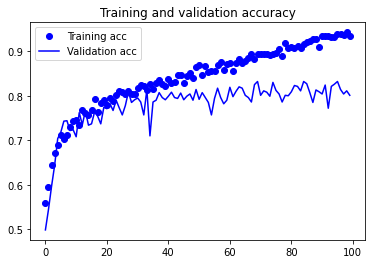

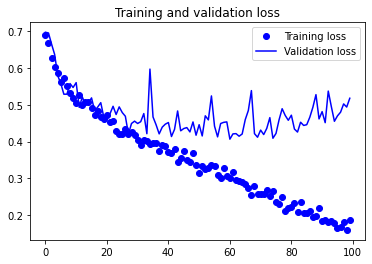

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Using data augmentation

Overfitting is caused by having too few samples to learn from, rendering us unable to train a model able to generalize to new data. 
Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. Data 
augmentation takes the approach of generating more training data from existing training samples, by "augmenting" the samples via a number 
of random transformations that yield believable-looking images. The goal is that at training time, our model would never see the exact same picture twice. This helps the model get exposed to more aspects of the data and generalize better.

In [15]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')

## Exmple of data augmentation

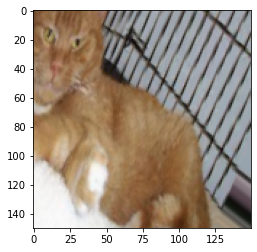

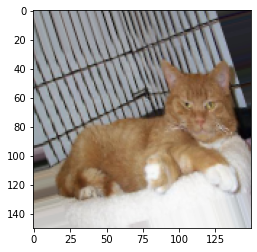

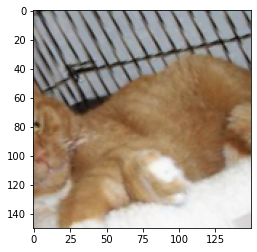

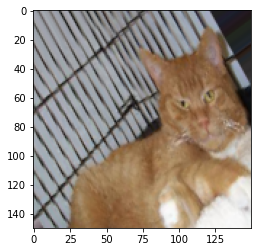

In [16]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

## CNN model with dropout

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1500, activation='relu'))
model.add(layers.Dense(700, activation='relu'))
model.add(layers.Dense(350, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.00005),
              metrics=['acc'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        73792     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

In [19]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=160,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=80,
        class_mode='binary')

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [20]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 130s 1s/step - loss: 0.6847 - acc: 0.5484 - val_loss: 0.6556 - val_acc: 0.6250
Epoch 2/100
100/100 [==============================] - 130s 1s/step - loss: 0.6654 - acc: 0.5957 - val_loss: 0.6296 - val_acc: 0.6587
Epoch 3/100
100/100 [==============================] - 129s 1s/step - loss: 0.6536 - acc: 0.6092 - val_loss: 0.6363 - val_acc: 0.6332
Epoch 4/100
100/100 [==============================] - 129s 1s/step - loss: 0.6415 - acc: 0.6229 - val_loss: 0.6474 - val_acc: 0.6185
Epoch 5/100
100/100 [==============================] - 129s 1s/step - loss: 0.6271 - acc: 0.6491 - val_loss: 0.5754 - val_acc: 0.7053
Epoch 6/100
100/100 [==============================] - 130s 1s/step - loss: 0.6143 - acc: 0.6599 - val_loss: 0.5581 - val_acc: 0.7168
Epoch 7/100
100/100 [==============================] - 131s 1s/step - loss: 0.6033 - acc: 0.6673 - val_loss: 0.5584 - val_acc: 0.7075
Epoch 8/100
100/100 [==============================] - 130s 1s

In [21]:
model.save('CvD_Model_02.h5')

# Results

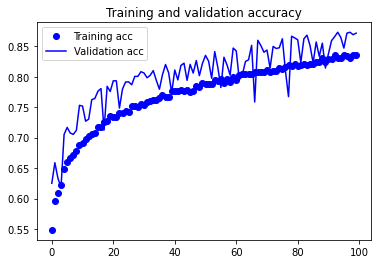

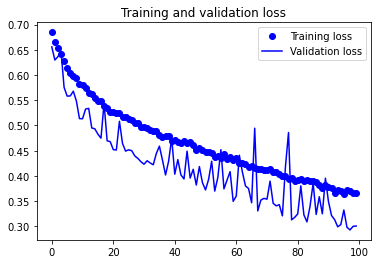

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=40,
        class_mode='binary',
        shuffle=False)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('Test Accuracy:', test_acc)

Found 2000 images belonging to 2 classes.
Test Accuracy: 0.8705000281333923


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
# load model
# from tensorflow.keras.models import load_model
# model = load_model('/kaggle/working/cats_and_dogs_small_1.h5')
# preds = model.predict_generator(test_generator, steps=len(test_generator))
# preds = model.predict(test_generator)
preds = model.predict_generator(test_generator,steps = len(test_generator.labels//50))

y=test_generator.classes # shape=(2500,)
y_test =y.reshape(2000,1)

acc = accuracy_score(test_generator.labels, np.round(preds))*100
cm = confusion_matrix(test_generator.labels, np.round(preds))

tn, fp, fn, tp = cm.ravel()

print('============TEST METRICS=============')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

============TEST METRICS=============
Accuracy: 87.05000000000001%
Precision: 83.2286995515695%
Recall: 92.80000000000001%
F1-score: 87.75413711583926


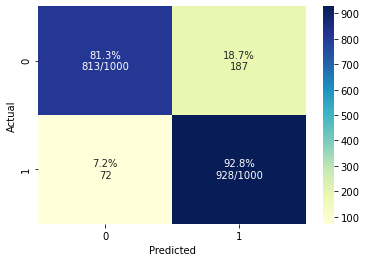

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots()
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(test_generator.labels, np.round(preds))

### Thanks! :)